<a href="https://colab.research.google.com/github/ThyTran1402/Project1_SocialNetworkAnalysis/blob/main/Project1_SocialAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

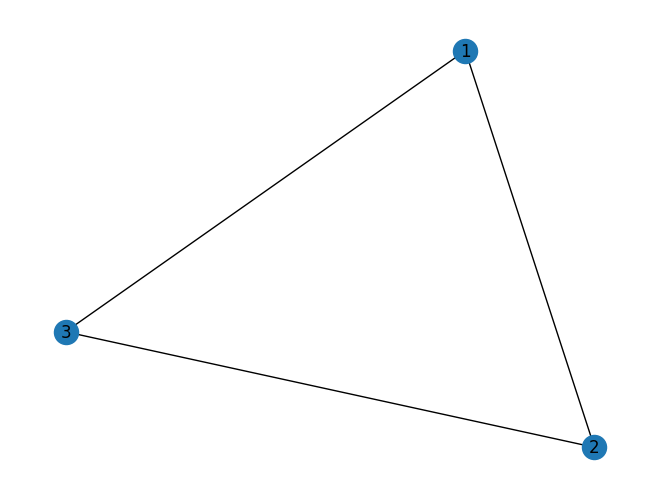

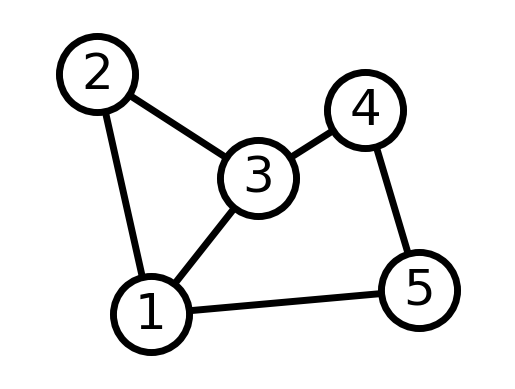

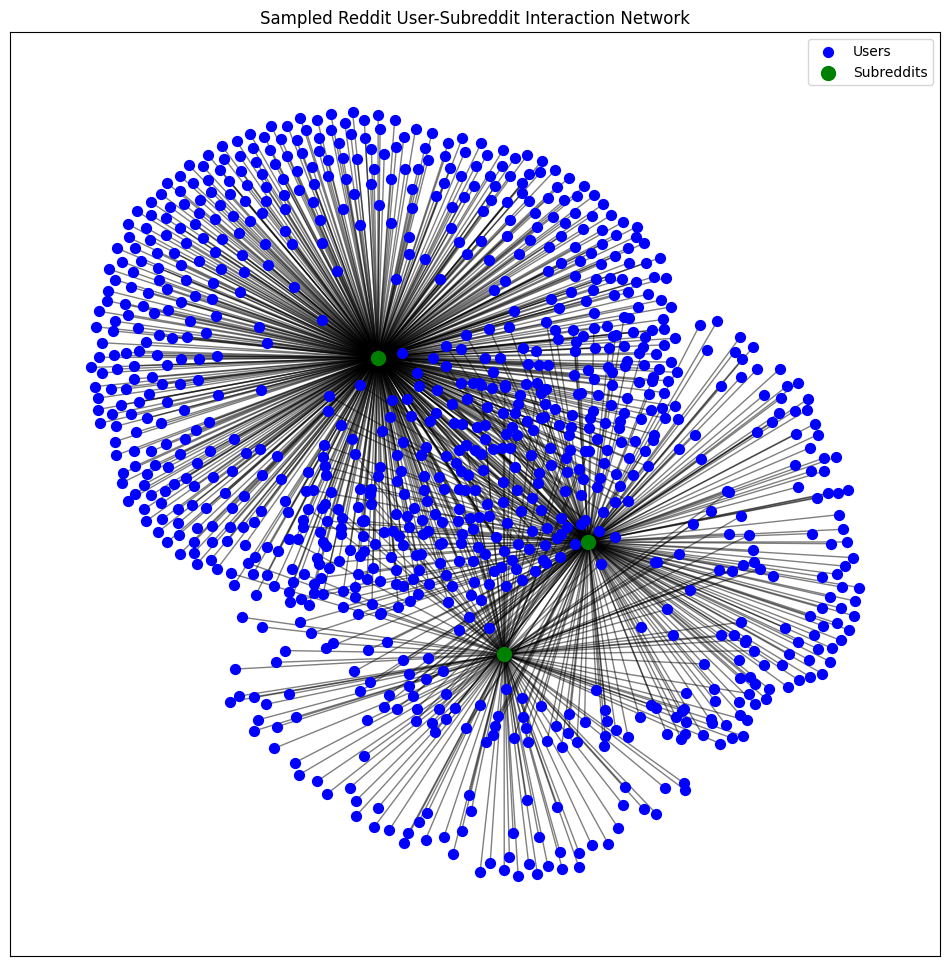

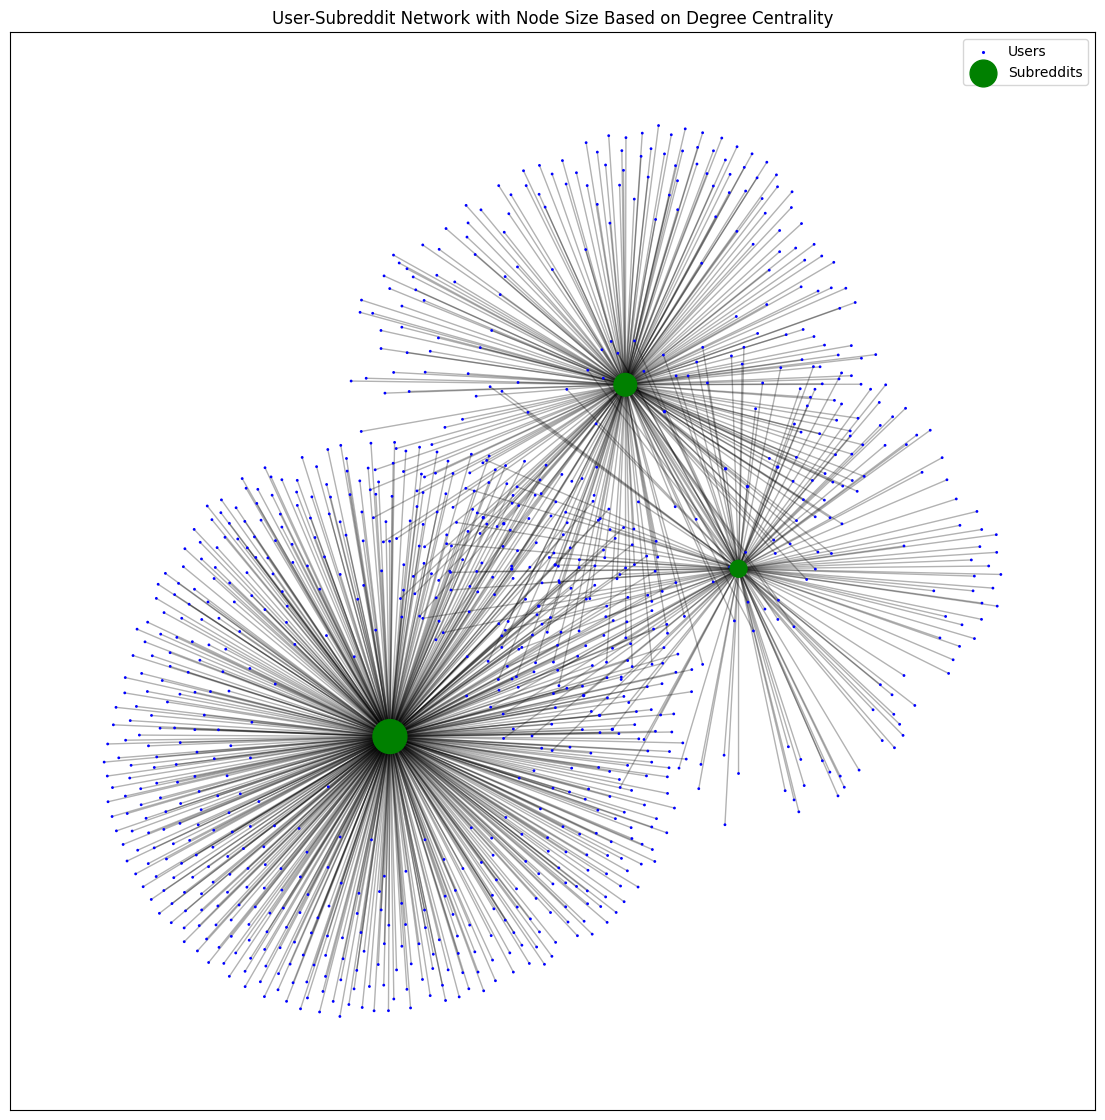

Top 10 nodes by Degree Centrality:
              Degree Centrality
funny                  0.595876
pics                   0.265979
gifs                   0.148454
Saarrex                0.002062
Feenominal             0.002062
Microsoftt             0.002062
I_SHIT_KARMA           0.002062
J0nesy                 0.002062
butwhymom              0.002062
IAMA_SWEET             0.002062


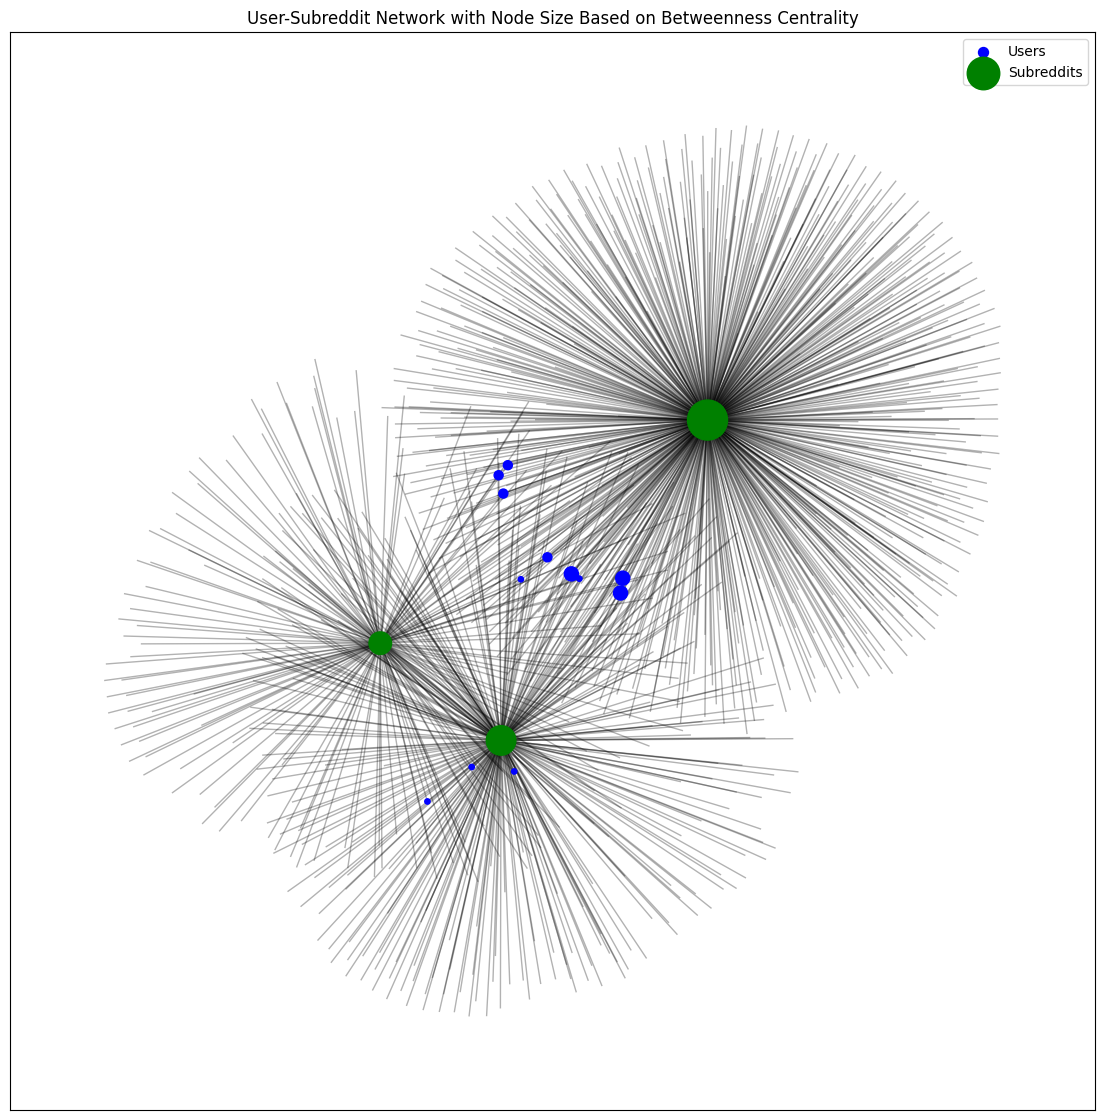

Top 10 nodes by Betweenness Centrality:


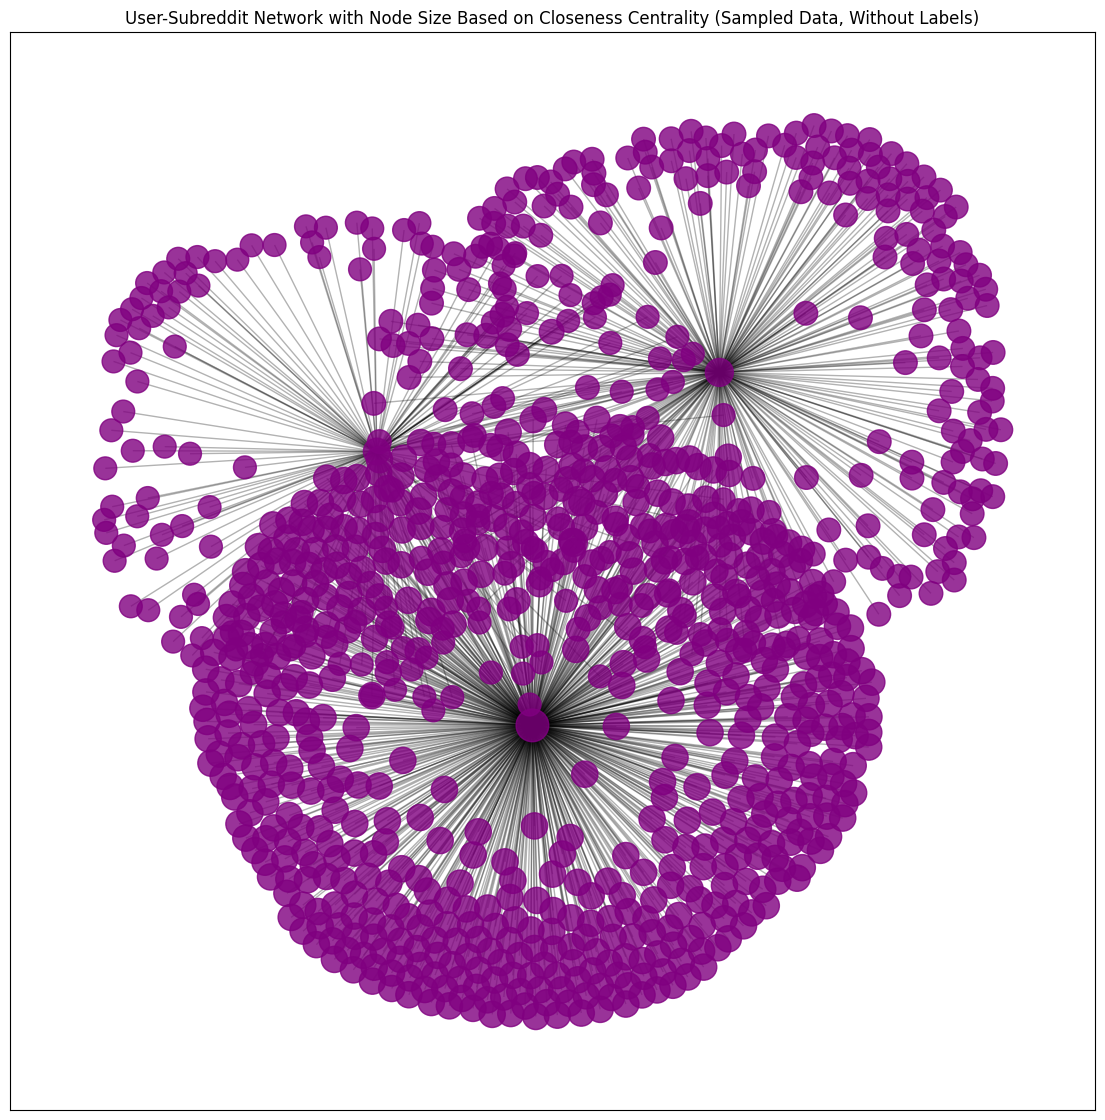

Top 10 nodes by Closeness Centrality:
             Node  Closeness Centrality
3           funny              0.553653
150     chauptman              0.439113
106   samanthakm9              0.439113
184     butwhymom              0.439113
1            pics              0.405518
163       Saarrex              0.397704
42   I_SHIT_KARMA              0.397704
241    Feenominal              0.397704
120    ReducedFat              0.397704
8            gifs              0.370229


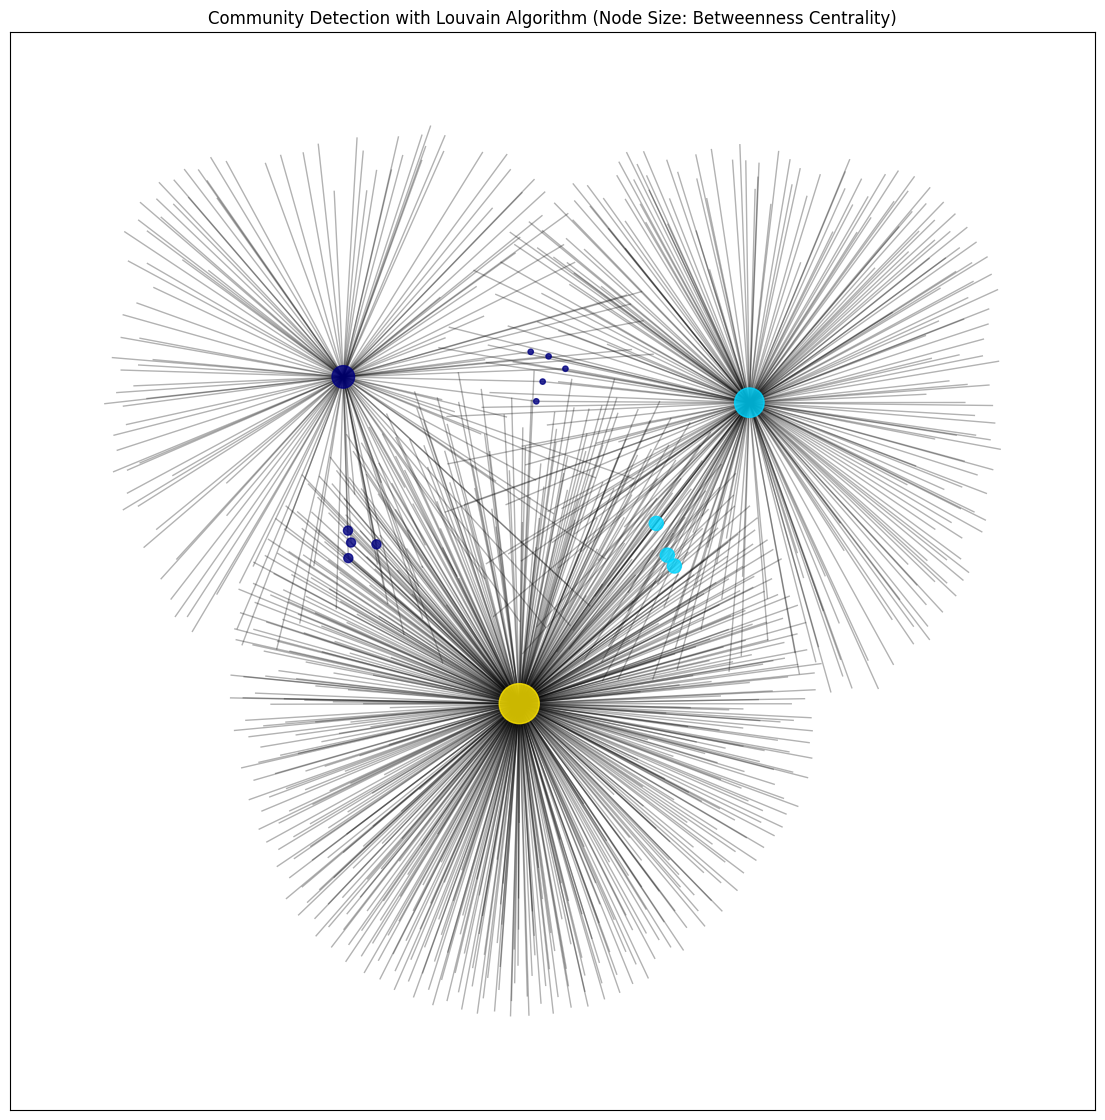

Number of communities detected: 3


In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import community as community_louvain
import csv



G = nx.Graph()
#G.add_node(1)
G.add_edges_from([(1, 2), (1, 3), (2, 3)])

#draw the graph
nx.draw(G, with_labels=True)
plt.show()


#Simple graph
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

# cleaned_data = open('top3Filtered_redditSubmissions', 'r')
# G = nx.Graph()
# G = nx.parse_edgelist(data, comments='t', delimiter=',', create_using=G, nodetype=int, data=(('weight', float),))



# Load the dataset from the CSV file
file_path = '/top3Filtered_redditSubmissions.csv'
reddit_data = pd.read_csv(file_path)

# Clean the data by removing rows where 'username' or 'subreddit' is missing
cleaned_data = reddit_data.dropna(subset=['username', 'subreddit'])

# Display the cleaned data to inspect
# print(cleaned_data.head())





# Let's sample a smaller subset of the data to optimize the visualization
sampled_data = cleaned_data.sample(n=1000, random_state=42)

# Recreate the graph with a smaller subset of data
G_sampled = nx.Graph()

# Add edges between users and subreddits based on the sampled data
for _, row in sampled_data.iterrows():
    G_sampled.add_edge(row['username'], row['subreddit'], title=row['title'], score=row['score'], comments=row['number_of_comments'])

# Draw the graph
plt.figure(figsize=(12, 12))
pos_sampled = nx.spring_layout(G_sampled, k=0.2)  # Faster layout calculation

# Draw nodes with different colors for users and subreddits
user_nodes_sampled = [n for n in G_sampled.nodes if n in sampled_data['username'].unique()]
subreddit_nodes_sampled = [n for n in G_sampled.nodes if n in sampled_data['subreddit'].unique()]

nx.draw_networkx_nodes(G_sampled, pos_sampled, nodelist=user_nodes_sampled, node_color='blue', node_size=50, label='Users')
nx.draw_networkx_nodes(G_sampled, pos_sampled, nodelist=subreddit_nodes_sampled, node_color='green', node_size=100, label='Subreddits')

# Draw edges
nx.draw_networkx_edges(G_sampled, pos_sampled, alpha=0.5)

# Display the graph
plt.title('Sampled Reddit User-Subreddit Interaction Network')
plt.legend(scatterpoints=1)
plt.show()



# Assuming 'G_sampled' is the graph constructed using the entire dataset

# Step 1: Calculate Degree Centrality as an example (you can switch to Betweenness, Closeness, etc.)
degree_centrality = nx.degree_centrality(G_sampled)

# Step 2: Extract user and subreddit nodes
user_nodes_full = [n for n in G_sampled.nodes if n in cleaned_data['username'].unique()]
subreddit_nodes_full = [n for n in G_sampled.nodes if n in cleaned_data['subreddit'].unique()]

# Step 3: Prepare node sizes based on Degree Centrality (or another centrality measure)
node_sizes = [degree_centrality[node] * 1000 for node in G_sampled.nodes]  # Scale centrality values for visualization

# Step 4: Plot the graph
plt.figure(figsize=(14, 14))

# Position the nodes
pos_full = nx.spring_layout(G_sampled, k=0.2)

# Draw nodes, scaling their size by centrality
nx.draw_networkx_nodes(G_sampled, pos_full, nodelist=user_nodes_full, node_color='blue', node_size=[degree_centrality[node] * 1000 for node in user_nodes_full], label='Users')
nx.draw_networkx_nodes(G_sampled, pos_full, nodelist=subreddit_nodes_full, node_color='green', node_size=[degree_centrality[node] * 1000 for node in subreddit_nodes_full], label='Subreddits')

# Draw edges
nx.draw_networkx_edges(G_sampled, pos_full, alpha=0.3)

# Optionally, add labels (this can be cluttered with a large graph)
# nx.draw_networkx_labels(G_full, pos_full, font_size=8)

# Add a legend
plt.title('User-Subreddit Network with Node Size Based on Degree Centrality')
plt.legend(scatterpoints=1)

# Display the plot
plt.show()

# Step 5: (Optional) Print out top central nodes for analysis
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality
}).sort_values('Degree Centrality', ascending=False)

print("Top 10 nodes by Degree Centrality:")
print(centrality_df.head(10))



# Let's calculate Betweenness Centrality and visualize it on the graph
betweenness_centrality = nx.betweenness_centrality(G_sampled)

# Prepare node sizes based on Betweenness Centrality
node_sizes_betweenness = [betweenness_centrality[node] * 1000 for node in G_sampled.nodes]  # Scale centrality values for visualization

# Plot the graph with node size reflecting Betweenness Centrality
plt.figure(figsize=(14, 14))

# Position the nodes using spring layout
pos_full_betweenness = nx.spring_layout(G_sampled, k=0.2)

# Draw nodes with sizes proportional to Betweenness Centrality
nx.draw_networkx_nodes(G_sampled, pos_full_betweenness, nodelist=user_nodes_full, node_color='blue', node_size=[betweenness_centrality[node] * 1000 for node in user_nodes_full], label='Users')
nx.draw_networkx_nodes(G_sampled, pos_full_betweenness, nodelist=subreddit_nodes_full, node_color='green', node_size=[betweenness_centrality[node] * 1000 for node in subreddit_nodes_full], label='Subreddits')

# Draw edges with transparency for clarity
nx.draw_networkx_edges(G_sampled, pos_full_betweenness, alpha=0.3)

# Add a title
plt.title('User-Subreddit Network with Node Size Based on Betweenness Centrality')

# Add a legend
plt.legend(scatterpoints=1)

# Show the plot
plt.show()

# Display the top 10 nodes by Betweenness Centrality
centrality_betweenness_df = pd.DataFrame({
    'Betweenness Centrality': betweenness_centrality
}).sort_values('Betweenness Centrality', ascending=False)

print("Top 10 nodes by Betweenness Centrality:")
centrality_betweenness_df.head(10)


# Step 1: Calculate Closeness Centrality for the sampled graph
closeness_centrality_sampled = nx.closeness_centrality(G_sampled)

# Step 2: Prepare node sizes based on Closeness Centrality
node_sizes_closeness_sampled = [closeness_centrality_sampled[node] * 1000 for node in G_sampled.nodes]  # Scale centrality values for visualization

# Step 3: Plot the graph with node size reflecting Closeness Centrality (without labels)
plt.figure(figsize=(14, 14))

# Position the nodes using spring layout
pos_sampled_closeness = nx.spring_layout(G_sampled, k=0.2)

# Draw nodes with sizes proportional to Closeness Centrality
nx.draw_networkx_nodes(G_sampled, pos_sampled_closeness, node_color='purple', node_size=node_sizes_closeness_sampled, alpha=0.8)

# Draw edges with transparency for clarity
nx.draw_networkx_edges(G_sampled, pos_sampled_closeness, alpha=0.3)

# Add a title
plt.title('User-Subreddit Network with Node Size Based on Closeness Centrality (Sampled Data, Without Labels)')

# Show the plot
plt.show()

# Step 4: Optionally display the top 10 nodes by Closeness Centrality
centrality_closeness_df = pd.DataFrame({
    'Node': closeness_centrality.keys(),
    'Closeness Centrality': closeness_centrality.values()
}).sort_values('Closeness Centrality', ascending=False)

print("Top 10 nodes by Closeness Centrality:")
print(centrality_closeness_df.head(10))



# Assuming the graph 'G_full' has already been created

# Step 1: Apply Louvain Community Detection
# This will return a dictionary where keys are node names and values are the community the node belongs to
louvain_communities = community_louvain.best_partition(G_sampled)

# Step 2: Prepare node colors based on communities
# Each community will have its own color
community_values = list(louvain_communities.values())
unique_communities = list(set(community_values))

# Assign a color to each community
community_colors = {community: plt.cm.jet(i / len(unique_communities)) for i, community in enumerate(unique_communities)}

# Color nodes based on their community
node_colors = [community_colors[louvain_communities[node]] for node in G_sampled.nodes]

# Step 3: Calculate Betweenness Centrality (already calculated before)
betweenness_centrality = nx.betweenness_centrality(G_sampled)

# Prepare node sizes based on Betweenness Centrality
node_sizes_betweenness = [betweenness_centrality[node] * 1000 for node in G_sampled.nodes]

# Step 4: Visualize the Graph
plt.figure(figsize=(14, 14))

# Position the nodes
pos_full = nx.spring_layout(G_sampled, k=0.2)

# Draw the nodes, with color based on their community and size based on Betweenness Centrality
nx.draw_networkx_nodes(G_sampled, pos_full, node_color=node_colors, node_size=node_sizes_betweenness, alpha=0.8)

# Draw the edges with some transparency for better clarity
nx.draw_networkx_edges(G_sampled, pos_full, alpha=0.3)

# Add a title
plt.title('Community Detection with Louvain Algorithm (Node Size: Betweenness Centrality)')

# Show the graph
plt.show()

# Optional: Print the number of communities detected
num_communities = len(unique_communities)
print(f"Number of communities detected: {num_communities}")
